### Data 88: Statistical Genomics - 02/10/20

# Lab 1 - Comparative Genomics through EDA

### by Jonathan Fischer and Shishi Luo

In [1]:
# Import the necessary modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import pandas as pd
plt.style.use('fivethirtyeight')

## Let's explore genome sizes for some commonly studied organisms

In this course we will primarily use pandas and numpy to store and manipulate data rather than the datascience module designed for Data 8. These modules are more powerful and are common tools in data analysis in Python. The guided examples below should help you get comfortable with some of the different syntax requirements of these modules. You'll often need to be aware of whether you're working with a pandas data frame or a numpy array, as they are indexed and sliced in different ways.

Load the table of model organisms and name it model_species

In [2]:
# Hints:
# table_name = pd.read_csv('filename')
# filename = 'https://raw.githubusercontent.com/jrfischer/Data88-Genetics_and_Genomics-SP20/master/Lab1/model_species.csv'

model_species = pd.read_csv('https://raw.githubusercontent.com/jrfischer/Data88-Genetics_and_Genomics-SP20/master/Lab1/model_species.csv')
model_species

,Scientific name,Common name,Genes,Proteins,Size
0,Escherichia coli,E. coli,5618,5358,5478680
1,Arabidopsis thaliana,A. thaliana,33583,35378,119668000
2,Caenorhabditis elegans,C. elegans,46711,27943,100286000
3,Danio rerio,Zebrafish,39803,47861,1371720000
4,Drosophila melanogaster,Fruit fly,17651,30443,143726000
5,Gallus gallus,Chicken,25062,46393,1230260000
6,Mus musculus,Mouse,48855,78065,2803570000
7,Saccharomyces cerevisiae S288c,Yeast,6350,5907,12157100
8,Rattus norvegicus,Rat,37647,50706,2870180000
9,Zea mays,Corn (maize),104305,116015,2067620000


We can check the size of our table by using the syntax df.shape. Try it below with our table model_species. The first value gives the number of rows and the second the number of columns. 

In [3]:
model_species.shape

(15, 5)

Let's rank organisms by their genome size. To sort the table, use table_name.sort_values('Column_name'). To sort in descending order, use the additional option like so: table_name.sort_values('Column_name', ascending = False).
Try both ways out.

In [4]:
#model_species.sort_values('Size', ascending = True)
model_species.sort_values('Size', ascending = False)

,Scientific name,Common name,Genes,Proteins,Size
8,Rattus norvegicus,Rat,37647,50706,2870180000
6,Mus musculus,Mouse,48855,78065,2803570000
11,Canis lupus familiaris,Dog,30186,47089,2410980000
14,Ailuropoda melanoleuca,Giant panda,27613,32507,2299510000
9,Zea mays,Corn (maize),104305,116015,2067620000
3,Danio rerio,Zebrafish,39803,47861,1371720000
5,Gallus gallus,Chicken,25062,46393,1230260000
10,Oryza sativa Japonica Group,Rice,66100,81951,374423000
4,Drosophila melanogaster,Fruit fly,17651,30443,143726000
1,Arabidopsis thaliana,A. thaliana,33583,35378,119668000


Can we extract just the organisms with more than 60,000 genes? This is done by table_name.loc[table_name['Column_name'] ~ condition,]. The ~ symbol in the above is the operator for the condition. In this case, it's > for greater than

In [5]:
model_species.loc[model_species['Genes'] > 60000,]

,Scientific name,Common name,Genes,Proteins,Size
9,Zea mays,Corn (maize),104305,116015,2067620000
10,Oryza sativa Japonica Group,Rice,66100,81951,374423000


Alternatively, say we simply want the first three rows of our table. We can access them using the .iloc attribute, e.g. table_name.iloc[0:3,]. Try it with model_species.

In [6]:
model_species.iloc[0:3,]

,Scientific name,Common name,Genes,Proteins,Size
0,Escherichia coli,E. coli,5618,5358,5478680
1,Arabidopsis thaliana,A. thaliana,33583,35378,119668000
2,Caenorhabditis elegans,C. elegans,46711,27943,100286000


Here we've demonstrated how to refer to specific columns and rows in pandas. Note that df.loc is used when the conditions are not integers, df.iloc when they are, and simply df["col_name"] when we want to extract a column named 'col_name'. Also don't forget the zero-indexing and half-open interval properties of Python.

## Let's compare the genome sizes of some pathogens

Now we're going to examine how the genomes of some pathogens compare. Load the provided pathogen information and name the resulting table pathogens.

In [7]:
# filename is 'https://raw.githubusercontent.com/jrfischer/Data88-Genetics_and_Genomics-SP20/master/Lab1/pathogens.csv'

pathogens = pd.read_csv('https://raw.githubusercontent.com/jrfischer/Data88-Genetics_and_Genomics-SP20/master/Lab1/pathogens.csv')

Take a look at the table. How many organisms does it have?

In [8]:
pathogens.shape[0]

32

With so many organisms, it can be hard to interpret the table. Histograms are a great way to visualize the distribution of a quantity of interest. Let's make a few to investigate our data.

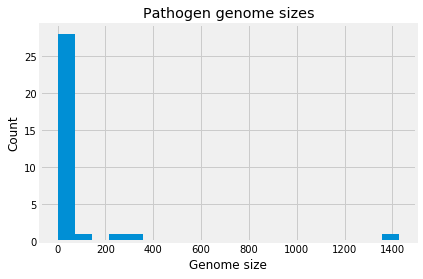

In [9]:
# Make a histogram of genome sizes for all the genomes in our table.
# Hint: plt.hist(table_name['column_name'], bins = b, density = n)
# b gives the number of bins in the histogram
# n is either True or False for whether bin heights should be normalized by number of observations
# Choose 20 bins and density = False

plt.hist(pathogens['Size'], bins = 20, density = False)
plt.title('Pathogen genome sizes')
plt.xlabel('Genome size')
plt.ylabel('Count')
plt.show()

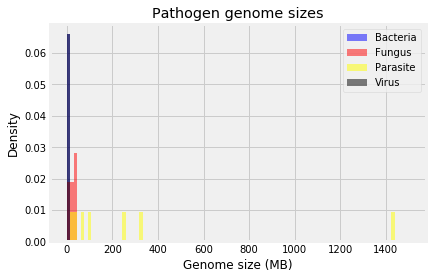

In [10]:
# Now let's make a histogram of genome sizes split by subgroup.
# Here we have Bacteria, Fungus, Parasite, and Virus as our category names.
# Let's density = True because each group may have a different number of observations
# Fill in the ?'s with the correct syntax to make the plot

bins = np.linspace(0, 1500, 100)
plt.hist(pathogens['Size'][pathogens['Subgroup'] == 'Bacteria'], bins, density = True, color = 'Blue', alpha = 0.5)
plt.hist(pathogens['Size'][pathogens['Subgroup'] == 'Fungus'], bins, density = True, color = 'Red', alpha = 0.5)
plt.hist(pathogens['Size'][pathogens['Subgroup'] == 'Parasite'], bins, density = True, color = 'Yellow', alpha = 0.5)
plt.hist(pathogens['Size'][pathogens['Subgroup'] == 'Virus'], bins, density = True, color = 'Black', alpha = 0.5)

plt.title('Pathogen genome sizes')
plt.xlabel('Genome size (MB)')
plt.ylabel('Density')
plt.legend(['Bacteria', 'Fungus', 'Parasite', 'Virus'])
plt.show()

Now that we've seen histograms, let's look at some scatterplots. 

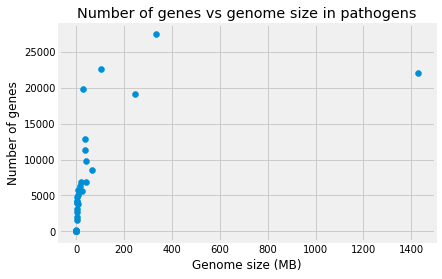

In [11]:
# Make scatterplot of the number of genes vs the genome size in pathogens
# Number of genes on Y axis, genome size on X axis
# plt.scatter(table['X_column'], table['Y_column'])

plt.scatter(pathogens['Size'], pathogens['Genes'])
plt.title('Number of genes vs genome size in pathogens')
plt.xlabel('Genome size (MB)')
plt.ylabel('Number of genes')
plt.show()

Now let's consider two different measurements of correlation.

In [12]:
# Also print Pearson AND Spearman correlations. 
# Command is print(sp.pearsonr(table['Variable1'], table['Variable2'])[0]) for Pearson
# and print(sp.spearmanr(table['Variable1'], table['Variable2'])[0]) for Spearman

print(sp.pearsonr(pathogens['Size'], pathogens['Genes'])[0], sp.spearmanr(pathogens['Size'], pathogens['Genes'])[0])

0.5605670844759859 0.961305719447032


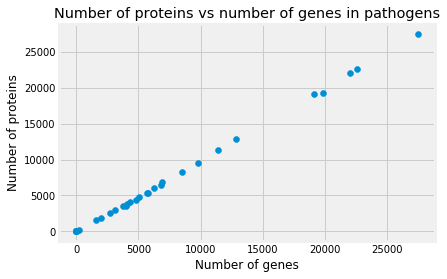

0.9997453346178793 0.9996332966629998


In [13]:
# Make scatterplot of the number of proteins vs number of genes in pathogens
# Number of proteins on Y axis, number of genes on X axis
# print both the pearson and spearman correlations between these quantities

plt.scatter(pathogens['Genes'], pathogens['Proteins'])
plt.title('Number of proteins vs number of genes in pathogens')
plt.xlabel('Number of genes')
plt.ylabel('Number of proteins')
plt.show()

print(sp.pearsonr(pathogens['Genes'], pathogens['Proteins'])[0], sp.spearmanr(pathogens['Genes'], pathogens['Proteins'])[0])

In [14]:
# Compute the mean, median, standard deviation, and interquartile range for 
# the genome sizes, number of genes, and number of proteins. Store them in a df with 
# Mean, Median, SD, and IQR as the columns

# mean: np.mean, median: np.median, standard deviation: np.std, IQR: sp.iqr
# Put these into a table names pathogen_summary with row indices Size, Genes, and Proteins

# Example of how to construct a pandas df
# df = pd.DataFrame(data = [ [row1], [row2], ... , [last_row] ],
# columns = ['first_col_name', ... , 'last_col_name'], index = ['first_index', ... , 'last_index'])


pathogen_summary = pd.DataFrame(data = [ [np.mean(pathogens['Size']), np.median(pathogens['Size']), np.std(pathogens['Size']), sp.iqr(pathogens['Size'])],
    [np.mean(pathogens['Genes']), np.median(pathogens['Genes']), np.std(pathogens['Genes']), sp.iqr(pathogens['Genes'])],
    [np.mean(pathogens['Proteins']), np.median(pathogens['Proteins']), np.std(pathogens['Proteins']), sp.iqr(pathogens['Proteins'])]],
    columns = ['Mean', 'Median', 'SD', 'IQR'], index = ['Size', 'Genes', 'Proteins'])

pathogen_summary

,Mean,Median,SD,IQR
Size,76.876088,5.015,252.748311,35.185
Genes,6898.062500,4536.500,7470.627437,7585.000
Proteins,6752.531250,4259.000,7469.775595,7415.000


## Let's repeat these steps but for animals

In [15]:
# Load animal information. Name the table animals
# filename is 'https://raw.githubusercontent.com/jrfischer/Data88-Genetics_and_Genomics-SP20/master/Lab1/animals.csv'

animals = pd.read_csv('https://raw.githubusercontent.com/jrfischer/Data88-Genetics_and_Genomics-SP20/master/Lab1/animals.csv')
animals

,Scientific name,Description,Subgroup,Size,Genes,Proteins
0,Drosophila yakuba,African fruit fly,Insects,165.710,16079,23317
1,Homo sapiens,Human,Mammals,3231.300,56201,102633
2,Anopheles gambiae,Mosquito,Insects,265.027,13184,14099
3,Drosophila melanogaster,Common fruit fly,Insects,143.726,17651,30443
4,Apis mellifera,Western honey bee,Insects,250.287,13401,21777
5,Danio rerio,Zebrafish,Fishes,1371.720,39803,47861
6,Mus musculus,House mouse,Mammals,2803.570,48855,78065
7,Takifugu rubripes,Japanese puffer,Fishes,391.485,23164,31052
8,Rattus norvegicus,Rat,Mammals,2870.180,37647,50706
9,Felis catus,Domestic cat,Mammals,2641.340,25364,33226


In [16]:
# How many different animal species are in the table?
animals.shape[0]

51

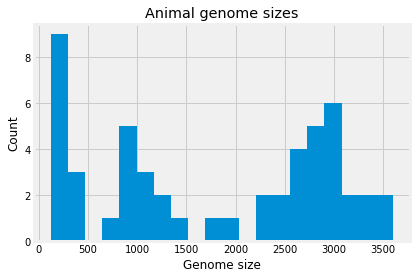

In [17]:
# Histogram of genome sizes (in megabases)

plt.hist(animals['Size'], bins = 20, density = False)
plt.title('Animal genome sizes')
plt.xlabel('Genome size')
plt.ylabel('Count')
plt.show()

In [18]:
print(sp.pearsonr(pathogens['Size'], pathogens['Genes'])[0], sp.spearmanr(pathogens['Size'], pathogens['Genes'])[0])

0.5605670844759859
0.961305719447032


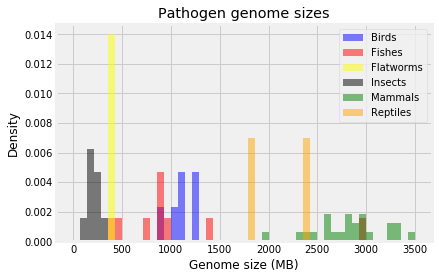

In [19]:
# Histograms of genome sizes split by Subgroup (aka pivot histograms)
# Let's normalize by frequency here because each group may have a different number of 

# Now let's make a histogram of genome sizes split by subgroup.
# Here we have Bacteria, Fungus, Parasite, and Virus as our category names.
# Let's density = True because each group may have a different number of observations
# Fill in the ?'s with the correct syntax to make the plot

bins = np.linspace(0, 3500, 50)
plt.hist(animals['Size'][animals['Subgroup'] == 'Birds'], bins, density = True, color = 'Blue', alpha = 0.5)
plt.hist(animals['Size'][animals['Subgroup'] == 'Fishes'], bins, density = True, color = 'Red', alpha = 0.5)
plt.hist(animals['Size'][animals['Subgroup'] == 'Flatworms'], bins, density = True, color = 'Yellow', alpha = 0.5)
plt.hist(animals['Size'][animals['Subgroup'] == 'Insects'], bins, density = True, color = 'Black', alpha = 0.5)
plt.hist(animals['Size'][animals['Subgroup'] == 'Mammals'], bins, density = True, color = 'Green', alpha = 0.5)
plt.hist(animals['Size'][animals['Subgroup'] == 'Reptiles'], bins, density = True, color = 'Orange', alpha = 0.5)


plt.title('Pathogen genome sizes')
plt.xlabel('Genome size (MB)')
plt.ylabel('Density')
plt.legend(['Birds', 'Fishes', 'Flatworms', 'Insects', 'Mammals', 'Reptiles'])
plt.show()

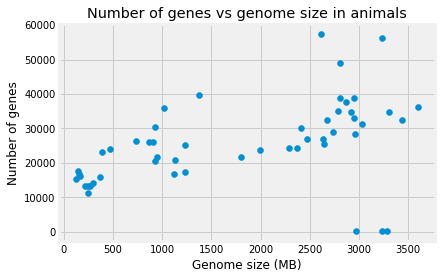

In [20]:
plt.scatter(animals['Size'], animals['Genes'])
plt.title('Number of genes vs genome size in animals')
plt.xlabel('Genome size (MB)')
plt.ylabel('Number of genes')
plt.show()

In [21]:
# Print correlations
print(sp.pearsonr(animals['Size'], animals['Genes'])[0], sp.spearmanr(animals['Size'], animals['Genes'])[0])

0.4311571793582962 0.5430769230769231


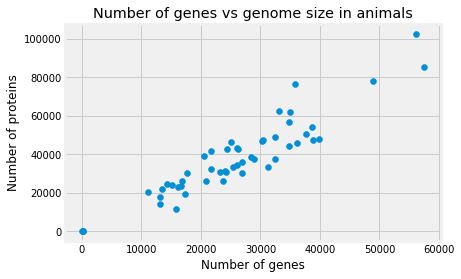

0.9295083298077683 0.9199999999999999


In [22]:
# Make scatterplot of the number of proteins vs number of genes in animals
# Print correlations

plt.scatter(animals['Genes'], animals['Proteins'])
plt.title('Number of genes vs genome size in animals')
plt.xlabel('Number of genes')
plt.ylabel('Number of proteins')
plt.show()

print(sp.pearsonr(animals['Genes'], animals['Proteins'])[0], sp.spearmanr(animals['Genes'], animals['Proteins'])[0])

In [23]:
# Table of summary statistics (name it animal_summary)

animal_summary = pd.DataFrame(data = [ [np.mean(animals['Size']), np.median(animals['Size']), np.std(animals['Size']), sp.iqr(animals['Size'])],
    [np.mean(animals['Genes']), np.median(animals['Genes']), np.std(animals['Genes']), sp.iqr(animals['Genes'])],
    [np.mean(animals['Proteins']), np.median(animals['Proteins']), np.std(animals['Proteins']), sp.iqr(animals['Proteins'])]],
    columns = ['Mean', 'Median', 'SD', 'IQR'], index = ['Size', 'Genes', 'Proteins'])

animal_summary

,Mean,Median,SD,IQR
Size,1789.721922,1995.61,1154.999634,2038.635
Genes,25684.823529,25364.00,11986.379367,15703.000
Proteins,37858.784314,36064.00,20125.121744,21864.000
